### Importazione librerie

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Caricamento file train.csv

In [4]:
file_path = "../../train.csv"
df = pd.read_csv(file_path)

### Controllo  e rimozione valori nulli e duplicati

In [5]:
# Valori mancanti per ciascuna colonna
missing_values_per_column = df.isnull().sum()
print("\nValori mancanti nel DataFrame per ciascuna colonna:")
print(missing_values_per_column)

# Totale dei valori mancanti in tutto il DataFrame
total_missing_values = missing_values_per_column.sum()
print(f"\nTotale dei valori mancanti nel DataFrame:\n{total_missing_values}")


Valori mancanti nel DataFrame per ciascuna colonna:
Year    0
S0      0
S1      0
S2      0
S3      0
       ..
S85     0
S86     0
S87     0
S88     0
S89     0
Length: 91, dtype: int64

Totale dei valori mancanti nel DataFrame:
0


In [6]:
print("\nDuplicati nel DataFrame:")
print(df.duplicated().sum())


Duplicati nel DataFrame:
52


In [7]:
clean_df = df.dropna() 
clean_df = df.drop_duplicates()

In [16]:
# Verifica rimozione valori nulli e duplicati
total_missing_values = missing_values_per_column.sum()
print(f"\nTotale dei valori mancanti nel DataFrame: {total_missing_values}")
print(f"\nDuplicati nel DataFrame: {clean_df.duplicated().sum()}")


Totale dei valori mancanti nel DataFrame: 0

Duplicati nel DataFrame: 0


In [9]:
clean_df.describe()

,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
count,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,...,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000
mean,1998.350143,43.379082,1.554115,8.644903,1.160495,-6.526296,-9.531860,-2.367001,-1.788615,3.712732,...,15.724619,-73.286196,41.487949,38.044051,0.334009,17.931321,-26.509443,4.488371,19.873068,1.309111
std,10.497821,6.066799,51.553786,35.236419,16.336976,22.842798,12.809783,14.531206,7.963667,10.554074,...,31.984394,174.926010,122.250505,94.579907,16.021250,114.048957,173.685614,13.286652,185.161556,22.113446
min,1956.000000,3.455260,-334.953220,-301.005060,-149.962040,-181.953370,-72.717370,-111.017810,-68.404510,-119.762620,...,-437.722030,-2984.920970,-1810.689190,-1848.702260,-272.289050,-2343.894110,-3819.933620,-233.456480,-7458.378150,-286.031200
25%,1994.000000,39.959190,-25.652865,-11.525215,-8.492365,-20.588825,-18.403075,-10.770910,-6.473035,-2.296255,...,-1.788015,-139.031800,-21.015265,-4.631245,-6.749575,-31.247580,-102.179795,-2.536405,-59.734690,-8.819860
50%,2002.000000,44.250210,8.654700,10.517340,-0.641620,-5.998880,-11.189760,-2.072920,-1.727880,3.821940,...,9.132190,-53.171760,28.675010,33.593230,0.818240,15.846730,-21.623440,3.145800,7.775050,0.062890
75%,2006.000000,47.823030,36.250215,29.795445,8.767810,7.740135,-2.448085,6.512805,2.913495,9.938115,...,26.208285,13.413625,89.185855,77.879375,8.451960,67.776985,51.887175,9.999690,85.829385,9.651235
max,2009.000000,61.970140,384.065730,318.868960,228.412110,262.068870,166.236890,160.815220,82.942190,92.792850,...,840.973380,4469.454870,3210.701700,1734.079690,199.121500,3662.065650,2833.608950,275.353660,7240.653730,600.766240


# Rimozione outlier

In [17]:
# Itera su ogni anno presente nel DataFrame
for year in clean_df['Year'].unique():
    # Filtra il DataFrame per l'anno corrente
    df_year = clean_df[clean_df['Year'] == year]
    
    # Calcola la mediana per ogni colonna
    median_values = df_year.median()
    
    # Calcola i limiti per individuare gli outlier per ogni colonna
    Q1 = df_year.quantile(0.25)
    Q3 = df_year.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Sostituisci gli outlier con la mediana per ogni colonna
    def replace_outliers(row):
        for col in df_year.columns[1:]:  # Escludi la colonna 'year'
            if row[col] < lower_limit[col] or row[col] > upper_limit[col]:
                row[col] = median_values[col]
        return row
    
    df_year = df_year.apply(replace_outliers, axis=1) # Sostituzione outlier con mediana
    
    # Sostituisci i dati nel DataFrame originale
    clean_df.loc[clean_df['Year'] == year] = df_year

In [18]:
# Inizializza una lista per memorizzare i risultati dei nuovi outlier
outliers_after_replacement = []
 
# Calcola gli outlier nel DataFrame df2
for col in clean_df.columns:
    if col.startswith('S'):
        # Calcolo dei cinque numeri riassuntivi
        q1 = clean_df[col].quantile(0.25)
        median = clean_df[col].median()
        q3 = clean_df[col].quantile(0.75)

        # Calcolo dei baffi
        iqr = q3 - q1
        lower_whisker = q1 - 1.5 * iqr
        upper_whisker = q3 + 1.5 * iqr

        # Calcolo degli outlier nel DataFrame sostituito
        outliers_lower_replaced = clean_df[clean_df[col] < lower_whisker][col]
        outliers_upper_replaced = clean_df[clean_df[col] > upper_whisker][col]
        num_outliers_replaced = len(outliers_lower_replaced) + len(outliers_upper_replaced)
 
        # Aggiungi i risultati alla lista
        outliers_after_replacement.append({
            'Feature': col,
            'Num_Outliers_After_Replacement': num_outliers_replaced
        })


# Converti la lista in un DataFrame
outliers_replaced_df = pd.DataFrame(outliers_after_replacement)
 
# Unisci il DataFrame originale con il nuovo DataFrame sui risultati dopo la sostituzione
outliers_summary_df = df_outliers.merge(outliers_replaced_df, on='Feature')
 
# Visualizza la tabella finale
print(outliers_summary_df)

NameError: name 'df2' is not defined

### Suddivisione del DataSet

In [10]:
X = clean_df.drop(columns=['Year'])  # Non la consideriamo per il modello
y = clean_df['Year'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Standardizzazione

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Salva il modello di scaling
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nDati di training normalizzati:")
print(X_train_scaled)


Dati di training normalizzati:
[[ 1.11523778  0.99254951 -0.60604379 ... -0.31686077  0.12821504
  -0.0748598 ]
 [ 0.9723074   0.39340974 -0.30877134 ... -0.57019125 -0.33966922
  -0.40339726]
 [ 1.25854557  0.56623081  1.03087905 ... -0.27038536  0.48972211
   0.34192717]
 ...
 [ 0.62506856  1.58337359 -0.66712655 ... -0.38625943 -0.49931311
  -0.66994517]
 [-0.45876481 -0.89315637 -0.41003635 ...  0.28574844  0.80761915
  -0.06129659]
 [-0.05552726 -0.28012032 -1.16357997 ...  0.3951414  -1.04961578
  -0.17714599]]


# Modeling

### PCA

In [12]:
# Riduzione della dimensionalità con PCA
pca = PCA(n_components=0.95)  # Mantieni il 95% della varianza spiegata
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Numero di componenti principali: {pca.n_components_}")
print(f"Forma dei dati di training dopo PCA: {X_train_pca.shape}")
print(f"Forma dei dati di test dopo PCA: {X_test_pca.shape}")

Numero di componenti principali: 67
Forma dei dati di training dopo PCA: (201698, 67)
Forma dei dati di test dopo PCA: (50425, 67)


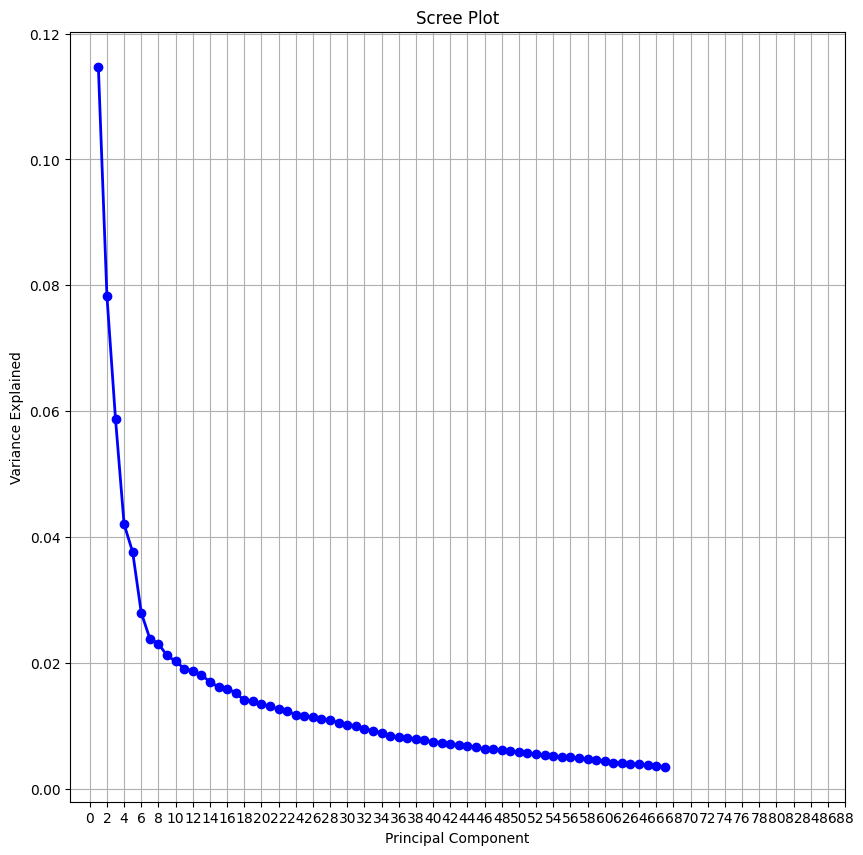

Explainer variance of each component: [0.11473394 0.07827068 0.05874241 0.04203498 0.03759528 0.02796334
 0.02385404 0.02305073 0.02117512 0.02026683 0.01909802 0.01876466
 0.01811801 0.01696774 0.01617874 0.01591935 0.01524432 0.01403409
 0.01400077 0.0134806  0.01311178 0.01262608 0.01233125 0.0117873
 0.01153085 0.01140069 0.01108067 0.01096267 0.01045499 0.01009085
 0.0099245  0.00949832 0.00925379 0.00892138 0.00839578 0.00815542
 0.00807133 0.0079663  0.00768503 0.00749284 0.00731072 0.00712106
 0.00698482 0.00684726 0.00658572 0.00626926 0.00624158 0.00612078
 0.00602194 0.00579327 0.00564639 0.00549447 0.00536356 0.00514714
 0.00503949 0.00499849 0.00482024 0.00468568 0.00461939 0.00437099
 0.00417003 0.00406906 0.00397042 0.00389276 0.00372712 0.00363565
 0.00350014]
Variance total: 0.9526828762853687


In [13]:
#Scree Plot -> mostra la percentuale di variazione spiegata da ogni componente principale
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(range(0,90,2))
plt.ylabel('Variance Explained')
plt.show()
print("Explainer variance of each component:",pca.explained_variance_ratio_)
print("Variance total:", sum(pca.explained_variance_ratio_))